In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv("data/HomeC.csv")
df.head()

C:\Users\Bofu Zou\AppData\Local\Temp\ipykernel_61652\2645709189.py:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/HomeC.csv")


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [117]:
# Rename columns to remove spaces and the kW unit 
df.columns = [col[:-5].replace(' ','_') if 'kW' in col else col for col in df.columns]

# Drop rows with nan values 
df = df.dropna()

# The columns "use" and "house_overall" are the same, so let's remove the 'house_overall' column
df.drop(['House_overall'], axis=1, inplace=True)

# The columns "gen" and "solar" are the same, so let's remove the 'solar' column
df.drop(['Solar'], axis=1, inplace=True)

# drop rows with cloudCover column values that are not numeric (bug in sensors) and convert column to numeric
df = df[df['cloudCover']!='cloudCover']
df["cloudCover"] = pd.to_numeric(df["cloudCover"])

# Create columns that regroup kitchens and furnaces 
df['kitchen'] = df['Kitchen_12'] + df['Kitchen_14'] + df['Kitchen_38']
df['Furnace'] = df['Furnace_1'] + df['Furnace_2']

# Convert "time" column (which is a unix timestamp) to a Y-m-d H-M-S 
import time 
start_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(df['time'].iloc[0])))
time_index = pd.date_range(start_time, periods=len(df), freq='min')  
time_index = pd.DatetimeIndex(time_index)
df = df.set_index(time_index)
df = df.drop(['time'], axis=1)

In [118]:
# Helpful functions

# lower first letter of a string  
func = lambda s: s[:1].lower() + s[1:] if s else ''

# Remove rows with values that appear less than a certain percentage %
def remove_less_percent(col, percent):
    keys_to_conserve = [key for key,value in df[col].value_counts(normalize=True).items() if value>=percent]
    return df[df[col].isin(keys_to_conserve)]

In [119]:
cols = list(df.dtypes.keys())
categ_cols = [col for col in cols if df[col].dtype=='O']
num_cols = [col for col in cols if col not in categ_cols]
print('categ_cols : ', categ_cols)
print('num_cols : ', num_cols)

categ_cols :  ['icon', 'summary']
num_cols :  ['use', 'gen', 'Dishwasher', 'Furnace_1', 'Furnace_2', 'Home_office', 'Fridge', 'Wine_cellar', 'Garage_door', 'Kitchen_12', 'Kitchen_14', 'Kitchen_38', 'Barn', 'Well', 'Microwave', 'Living_room', 'temperature', 'humidity', 'visibility', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability', 'kitchen', 'Furnace']


In [120]:
print(len(df))
df = remove_less_percent('summary', 0.05)
print(len(df))
df = remove_less_percent('icon', 0.05)
print(len(df))

503852
466308
466308


In [121]:
df["month"] = df.index.month

In [122]:
location = df[["Home_office", "Living_room", "Barn", "Well", "kitchen", "Kitchen_12", "Kitchen_14", "Kitchen_38", "temperature", "cloudCover", "month"]]
location


,Home_office,Living_room,Barn,Well,kitchen,Kitchen_12,Kitchen_14,Kitchen_38,temperature,cloudCover,month
2015-12-31 21:58:58,0.043400,0.001617,0.031767,0.001033,0.000567,0.000517,0.000050,0.000000,35.40,0.75,12
2015-12-31 21:59:58,0.043583,0.001683,0.031700,0.001083,0.000583,0.000350,0.000217,0.000017,35.40,0.75,12
2015-12-31 22:00:58,0.043533,0.001683,0.031733,0.001017,0.000633,0.000417,0.000200,0.000017,35.40,0.75,12
2015-12-31 22:01:58,0.043583,0.001600,0.031767,0.001017,0.001083,0.000733,0.000333,0.000017,35.40,0.75,12
2015-12-31 22:02:58,0.043367,0.001617,0.031800,0.001017,0.000733,0.000683,0.000050,0.000000,35.40,0.75,12
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-15 18:27:58,0.041783,0.000967,0.032283,0.000983,0.000633,0.000467,0.000150,0.000017,35.12,0.31,12
2016-12-15 18:28:58,0.041750,0.000933,0.032200,0.000950,0.000600,0.000467,0.000100,0.000033,35.12,0.31,12
2016-12-15 18:29:58,0.042033,0.001000,0.032283,0.001000,0.000600,0.000533,0.000067,0.000000,35.12,0.31,12
2016-12-15 18:30:58,0.042100,0.000950,0.032183,0.000950,0.000650,0.000517,0.000117,0.000017,35.12,0.31,12


In [132]:
# 1. Find the location with the greatest average energy use overall and by month
location_avg = location[['Home_office', 'Living_room', 'Barn', 'Well', 'kitchen']].mean()
print("Average energy use by location:")
print(location_avg)

location_monthly_avg = location.groupby('month').mean()
print("Monthly average energy use by location:")
print(location_monthly_avg[['Home_office', 'Living_room', 'Barn', 'Well', 'kitchen']])

#for each row inn location_monthly_avg, pick the location with the highest energy use
location_monthly_avg['highest_energy_use'] = location_monthly_avg[['Home_office', 'Living_room', 'Barn', 'Well', 'kitchen']].idxmax(axis=1)
print("Location with the greatest average energy use by month:")

location_monthly_avg['highest_energy_use']



Average energy use by location:
Home_office    0.081886
Living_room    0.035532
Barn           0.058770
Well           0.015677
kitchen        0.009841
dtype: float64
Monthly average energy use by location:
       Home_office  Living_room      Barn      Well   kitchen
month                                                        
1         0.091420     0.044356  0.074052  0.017327  0.010482
2         0.069926     0.034542  0.069036  0.017568  0.009769
3         0.080134     0.035553  0.040879  0.016721  0.008979
4         0.071471     0.035707  0.061524  0.014753  0.007438
5         0.062082     0.024818  0.075403  0.009305  0.006366
6         0.077959     0.027586  0.071232  0.019061  0.006568
7         0.093516     0.023662  0.051821  0.017802  0.009618
8         0.099653     0.040737  0.036223  0.014269  0.011999
9         0.082817     0.033432  0.062955  0.013834  0.012437
10        0.088901     0.032818  0.061934  0.014195  0.011179
11        0.082647     0.051442  0.053323  0.0180

month
1     Home_office
2     Home_office
3     Home_office
4     Home_office
5            Barn
6     Home_office
7     Home_office
8     Home_office
9     Home_office
10    Home_office
11    Home_office
12    Home_office
Name: highest_energy_use, dtype: object

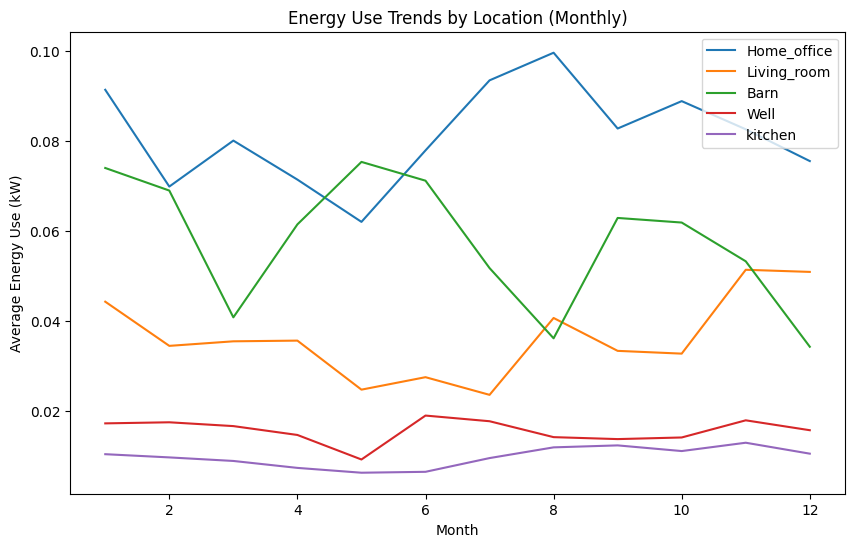

In [124]:
# 2. Trends of energy use by location over time (by month)
plt.figure(figsize=(10, 6))
for col in ['Home_office', 'Living_room', 'Barn', 'Well', 'kitchen']:
    plt.plot(location_monthly_avg.index, location_monthly_avg[col], label=col)

plt.title("Energy Use Trends by Location (Monthly)")
plt.xlabel("Month")
plt.ylabel("Average Energy Use (kW)")
plt.legend()
plt.show()

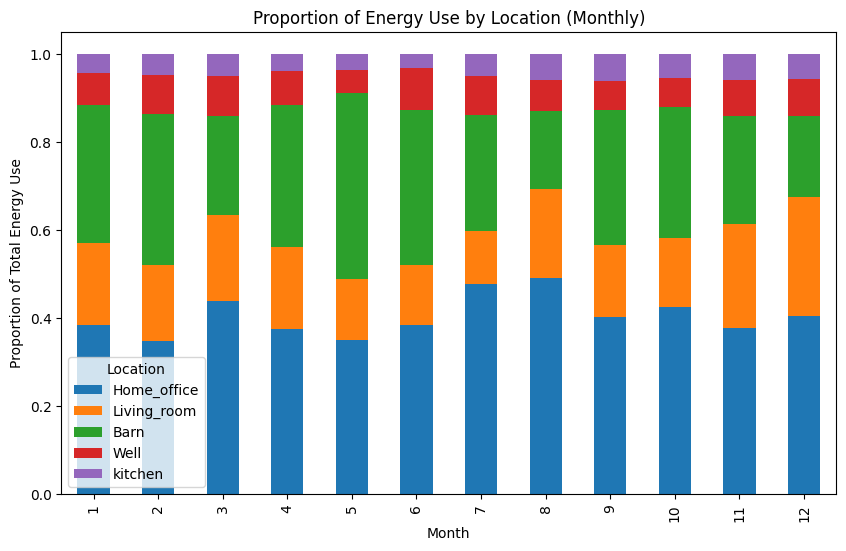

In [130]:
# 3. Proportion of each location's energy use over time
location_monthly_prop = location_monthly_avg[['Home_office', 'Living_room', 'Barn', 'Well', 'kitchen']].div(
    location_monthly_avg[['Home_office', 'Living_room', 'Barn', 'Well', 'kitchen']].sum(axis=1), axis=0)

location_monthly_prop.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Proportion of Energy Use by Location (Monthly)")
plt.xlabel("Month")
plt.ylabel("Proportion of Total Energy Use")
plt.legend(title="Location")
plt.show()

In [131]:
location_monthly_prop

,Home_office,Living_room,Barn,Well,kitchen
month,,,,,
1,0.384705,0.186653,0.311617,0.072915,0.044110
2,0.348165,0.171989,0.343736,0.087472,0.048639
3,0.439654,0.195061,0.224283,0.091740,0.049263
4,0.374401,0.187053,0.322296,0.077284,0.038967
5,0.348828,0.139448,0.423672,0.052283,0.035770
6,0.385164,0.136291,0.351927,0.094171,0.032448
7,0.476103,0.120468,0.263827,0.090634,0.048968
8,0.491191,0.200792,0.178543,0.070330,0.059144
9,0.403051,0.162708,0.306385,0.067329,0.060527



Correlation matrix:
             temperature  cloudCover
Home_office     0.016756   -0.033458
Living_room    -0.053890   -0.008578
Barn           -0.016598   -0.011855
Well           -0.004248   -0.003337
kitchen        -0.005876   -0.005591
Kitchen_12      0.002552   -0.026485
Kitchen_14     -0.006851    0.001823
Kitchen_38     -0.039441   -0.003762
temperature     1.000000    0.008530
cloudCover      0.008530    1.000000
month           0.225674    0.052000


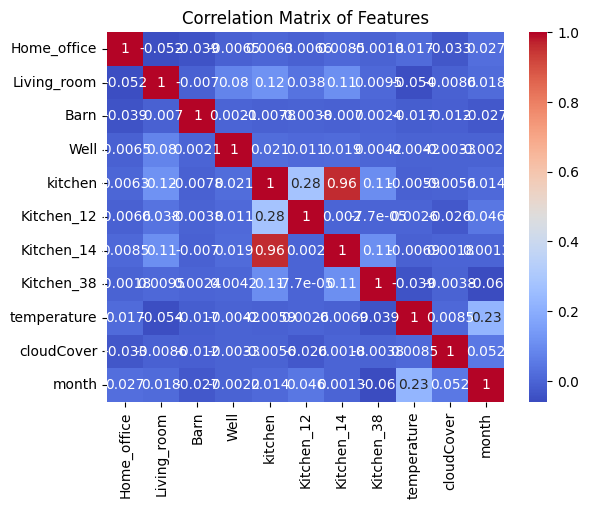

In [126]:
# 4. Correlation of temperature and cloudCover with energy use by location
correlations = location.corr()
print("\nCorrelation matrix:")
print(correlations[['temperature', 'cloudCover']])

sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()

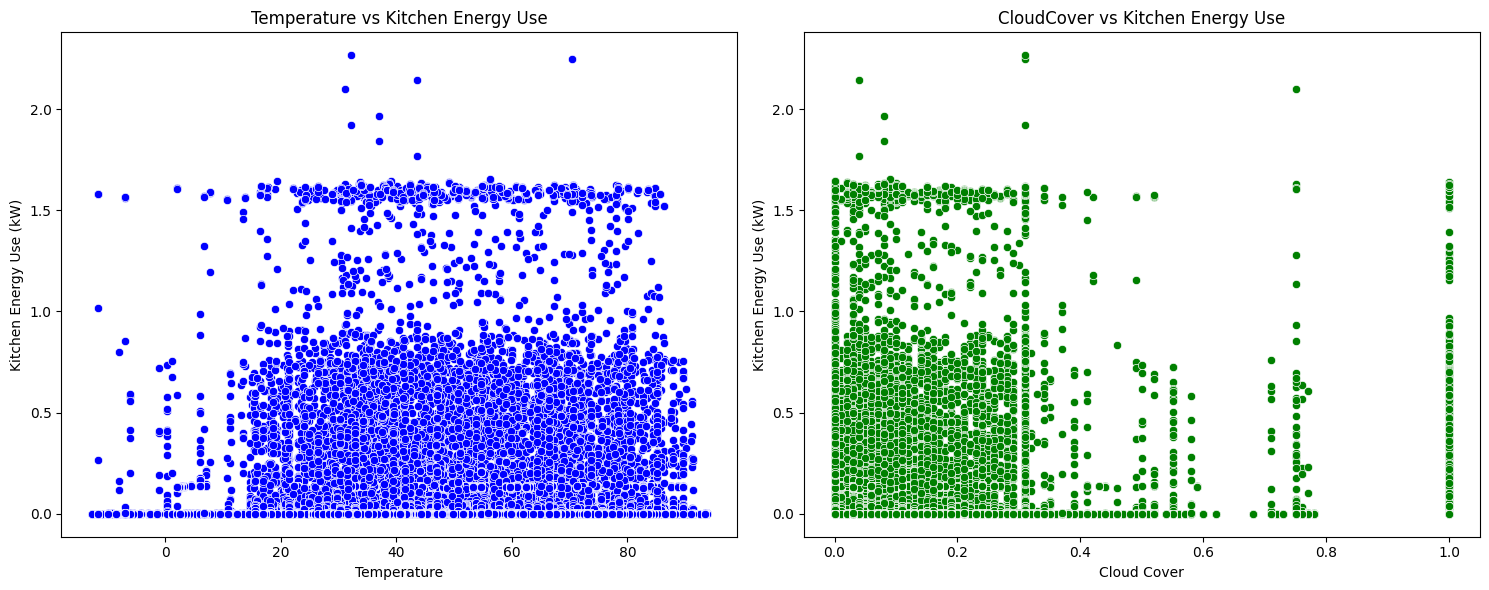

In [127]:
# 5. Scatter plots of temperature and cloudCover with energy use by location
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(data=location, x='temperature', y='kitchen', ax=axes[0], color="blue")
axes[0].set_title("Temperature vs Kitchen Energy Use")
axes[0].set_xlabel("Temperature")
axes[0].set_ylabel("Kitchen Energy Use (kW)")

sns.scatterplot(data=location, x='cloudCover', y='kitchen', ax=axes[1], color="green")
axes[1].set_title("CloudCover vs Kitchen Energy Use")
axes[1].set_xlabel("Cloud Cover")
axes[1].set_ylabel("Kitchen Energy Use (kW)")

plt.tight_layout()
plt.show()